In [1227]:
import requests
import numpy as np
import matplotlib.pyplot as plt

In [1228]:
sections = requests.get("http://localhost:8000/data/get-dummysections").json()
for section in sections:
    print(section.get("name"))

test-0
test-0
test-1-1
test-1-1-1
test-1-2-1
test-1-2-2
400mm-n-1
400mm-n-2
400mm-n-3
400mm-n-b-1
400mm-n-b-2
400mm-n-b-3
600mm-n-1
600mm-n-2
600mm-n-3
600mm-n-b-1
600mm-n-b-2
600mm-n-b-3
800mm-n-1
800mm-n-2
800mm-n-3
800mm-n-b-1
800mm-n-b-2
800mm-n-b-3
1000mm-n-1
1000mm-n-2
1000mm-n-3
1000mm-n-b-1
1000mm-n-b-2
1000mm-n-b-3
1200mm-n-1
1200mm-n-2
1200mm-n-3
1200mm-n-b-1
1200mm-n-b-2
1200mm-n-b-3
1400mm-n-1
1400mm-n-2
1400mm-n-3
1400mm-n-b-1
1400mm-n-b-2
1400mm-n-b-3
1600mm-n-1
1600mm-n-2
1600mm-n-3
1600mm-n-b-1
test-00
test-new-1-1-1
test-new-1-1-2
test-floor-1
calpoints-r-1
calpoints-r-2
calpoints-r-3
calpoints-r-4
calpoints-r-5
calpoints-l-1
calpoints-l-2
calpoints-l-3
calpoints-l-4
calpoints-l-5
measpoints-r-1
measpoints-r-2
measpoints-r-3
measpoints-r-4
measpoints-r-5
measpoints-l-1
measpoints-l-2
measpoints-l-3
measpoints-l-4
measpoints-l-5
calpoints-c-r-1
calpoints-c-r-2
calpoints-c-r-3
calpoints-c-r-4
calpoints-c-r-5
calpoints-c-l-1
calpoints-c-l-2
calpoints-c-l-3
calpoints-c-l-4

In [1229]:
# grid: 23
point_calc = []

for section in sections:
    if section.get("name").find("2024_12_05_desk_test_2") ==0 :
        points = section.get("points")
        point_disp = []
        for point in points:
            h = point.get("h")
            v = point.get("v")
            l = point.get("l")
            point_disp.append([h,v,l])
        point_calc.append(point_disp)

point_arr = np.array(point_calc)
print(point_arr)


[[[19481  6795  9630]
  [21428  7378  8690]
  [25317  8481  7285]
  [31784 10099  5806]
  [41519 11854  4627]
  [54214 12894  4062]
  [67402 12455  4241]
  [77588 11009  5033]
  [24600  6472 10225]
  [29968  7714  8263]
  [37706  8796  6972]
  [49954  9832  6017]
  [62204 10168  5698]
  [72826  9413  6241]]]


In [1230]:
#np.mean(point_arr[0]-point_arr[1], axis=0)

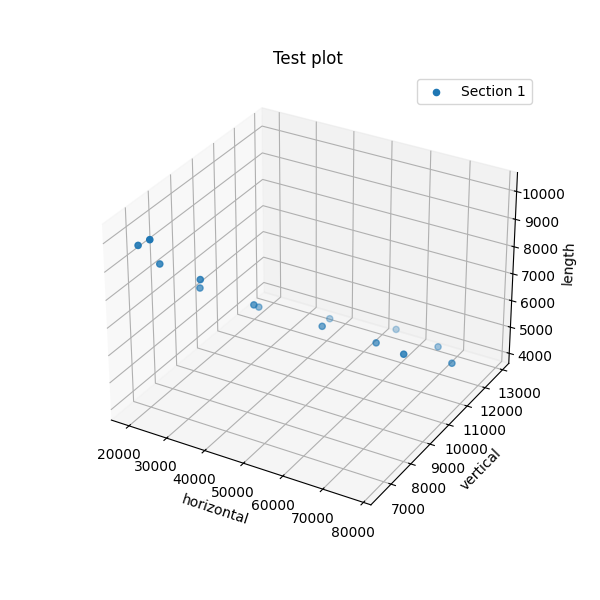

In [1231]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


for i, section in enumerate(point_calc):
    section = np.array(section)
    x, y, z = section[:, 0], section[:, 1], section[:, 2]
    ax.scatter(x, y, z, marker='o', label=f'Section {i+1}')

# Labels and title
ax.set_xlabel('horizontal')
ax.set_ylabel('vertical')
ax.set_zlabel('length')
ax.set_title('Test plot')

# Display legend
ax.legend()

# Show the plot
plt.show()

In [1232]:
mean_points = np.mean(point_arr, axis=0)
std_points = np.std(point_arr, axis=0)

In [1233]:
print(mean_points)

print()

print(std_points)


p_diff = std_points/mean_points

print(p_diff *100)

[[19481.  6795.  9630.]
 [21428.  7378.  8690.]
 [25317.  8481.  7285.]
 [31784. 10099.  5806.]
 [41519. 11854.  4627.]
 [54214. 12894.  4062.]
 [67402. 12455.  4241.]
 [77588. 11009.  5033.]
 [24600.  6472. 10225.]
 [29968.  7714.  8263.]
 [37706.  8796.  6972.]
 [49954.  9832.  6017.]
 [62204. 10168.  5698.]
 [72826.  9413.  6241.]]

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [1234]:
differences = []

# Calculate the difference between each point in a section and the average
for section in point_arr:
    diff = section - mean_points  # Difference from the average
    differences.append(diff)

# Convert differences list to numpy array for easier manipulation if needed
differences_np = np.array(differences)

print("Differences from the average for each section:")
print(differences_np )

print("In percentage:")
print(differences_np / mean_points * 100)

Differences from the average for each section:
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
In percentage:
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


# Plot XYZ conversion

In [1235]:
HORIZONTAL_MAX = 228000
VERTICAL_MAX = 228000

LENGTH_OFFSET = 170 + 35 - 2 + 18 

V_SCALE = [
    1729, 2158, 2593, 3029, 3467, 
    3892, 4328, 4784, 5233, 5668, 
    6103, 6549, 7003, 7428, 7863, 
    8314, 8777, 9212, 9648, 10097, 
    10551, 10980, 11432, 11879, 12334, 
    12780, 13217, 13663, 14112, 14545, 
    14990, 15436, 15887, 16333, 16756, 
    17210, 17656, 18092, 18544, 18993, 
    19449, 19892, 20331, 20786, 21232,
    21668, 22113, 22559, 23012, 23448, 
    23878, 24329, 24776, 25220, 25666,
    26115, 26571
]
MM_CSALE = np.arange(200,3050,50)


def convert_to_xyz(h, v, l):
    # Normalize h and v to radians between 0 and 2π using numpy
    h_angle = (h % HORIZONTAL_MAX) * (2 * np.pi / HORIZONTAL_MAX)
    v_angle = (v % VERTICAL_MAX) * (2 * np.pi / VERTICAL_MAX)

    #v_angle += np.pi/2*1.0015
    #h_angle += np.pi/2
    # Compute the radial distance r
    #r = (l - LENGTH_V_OFFSET)*(LENGTH_MAX_VALUE_MM/ (LENGTH_MAX-LENGTH_V_OFFSET)) + LENGTH_OFFSET
    #r = p(l)
    #r = (l-VOLTAGE_ZERO)*((3000-17)/VOLTAGE_3000)+LENGTH_OFFSET
    r = np.interp([l],V_SCALE, MM_CSALE) + LENGTH_OFFSET
    r = 1
    # Convert spherical to Cartesian coordinates
    x = r * np.sin(v_angle) * np.cos(h_angle)
    y = r * np.sin(v_angle) * np.sin(h_angle)
    z = r * np.cos(v_angle)
    

    return x, y, z

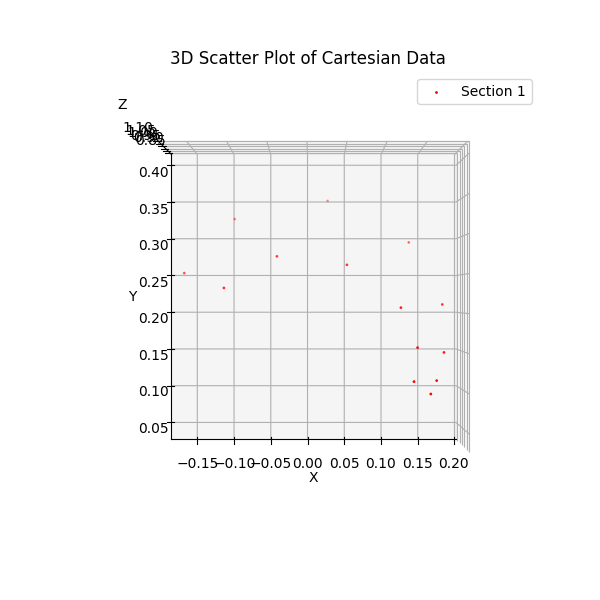

Average Points:
[[ 0.15997396  0.09521032  0.98251887]
 [ 0.16772938  0.11242789  0.97940126]
 [ 0.17747981  0.14878716  0.97281206]
 [ 0.17591017  0.21102355  0.96152206]
 [ 0.13278443  0.29212941  0.94711599]
 [ 0.02668421  0.34687553  0.9375315 ]
 [-0.09515364  0.32280069  0.94167165]
 [-0.16055147  0.25194383  0.95433093]
 [ 0.13818077  0.11126748  0.98413699]
 [ 0.14303214  0.15509961  0.9774896 ]
 [ 0.12169617  0.20689451  0.97076501]
 [ 0.05164344  0.26261586  0.96351744]
 [-0.03952529  0.27371651  0.96099793]
 [-0.10835564  0.23249208  0.96654358]]

Standard Deviation of Points:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Differences from the average for each section:
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [1236]:
%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D



data_cartesian = []
for section in point_calc:
    section_cartesian = [convert_to_xyz(h, v, l) for h, v, l in section]
    #section_cartesian = [convert_to_xyz(h, 0, l) for h, v, l in section]
    data_cartesian.append(section_cartesian)

data_np  = np.array(data_cartesian)

# Calculate the average and standard deviation
mean_points = np.mean(data_np, axis=0)
std_points = np.std(data_np, axis=0)

# Calculate the difference between each section and the average
differences = []
for section in data_np:
    diff = section - mean_points  # Difference from the average
    differences.append(diff)

# Convert differences list to numpy array
differences_np = np.array(differences)

# Plot the Cartesian coordinates for each section
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

# Plot each section as a scatter plot
colors = ['r', 'g', 'b']
for i, section in enumerate(data_np):
    x, y, z = section[:, 0], section[:, 1], section[:, 2]
    ax.scatter(x, y, z, color=colors[i % len(colors)], label=f'Section {i+1}', s=1)

# Plot average points
#ax.scatter(mean_points[:, 0], mean_points[:, 1], mean_points[:, 2], color='k', label='Mean Points', s=5, marker='x')

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot of Cartesian Data')


ax.view_init(elev=90, azim=-90, roll=0)

# Show legend
ax.legend()

ax.axis("equal")

# Show the plot
plt.show()

# Print results
print("Average Points:")
print(mean_points)

print("\nStandard Deviation of Points:")
print(std_points)

print("\nDifferences from the average for each section:")
print(differences_np)

In [1237]:
print(np.max(differences_np))

0.0


(np.float64(-0.17745303767595735),
 np.float64(0.1943813748939925),
 np.float64(0.0826270642729493),
 np.float64(0.35945879408486103))

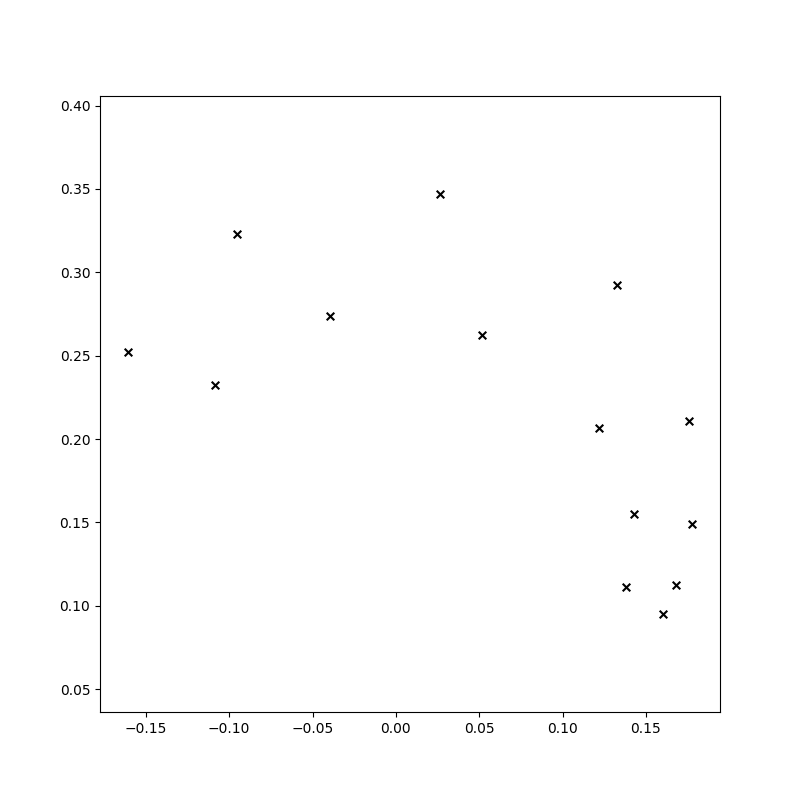

In [1238]:
plt.figure(figsize=(8,8))
plt.scatter(mean_points[:,0], mean_points[:,1], color='k', label='Mean Points', s=30, marker='x')
plt.axis("equal")

In [1239]:
def calc_dist(point1, point2):
    return np.linalg.norm(point1-point2)

In [1240]:
for i in range (len(mean_points)-1):
    print(f"{i} - {i+1} : {calc_dist(mean_points[i], mean_points[i+1]):.2f}")

0 - 1 : 0.02
1 - 2 : 0.04
2 - 3 : 0.06
3 - 4 : 0.09
4 - 5 : 0.12
5 - 6 : 0.12
6 - 7 : 0.10
7 - 8 : 0.33
8 - 9 : 0.04
9 - 10 : 0.06
10 - 11 : 0.09
11 - 12 : 0.09
12 - 13 : 0.08


In [1241]:
for sec in data_np:
    for i in range (len(sec)-1):
        if i == 7:
            continue
        print(f"{i+1} - {i+2} : {calc_dist(sec[i], sec[i+1]):.2f}")
    print("-------------------")

1 - 2 : 0.02
2 - 3 : 0.04
3 - 4 : 0.06
4 - 5 : 0.09
5 - 6 : 0.12
6 - 7 : 0.12
7 - 8 : 0.10
9 - 10 : 0.04
10 - 11 : 0.06
11 - 12 : 0.09
12 - 13 : 0.09
13 - 14 : 0.08
-------------------


In [1242]:
for sec in data_np:
    for i in range (len(sec)-6):
        if i == 0:
            continue
        print(f"{i+1} - {i+6} : {calc_dist(sec[i], sec[i+6]):.2f}")
    print("-------------------")

2 - 7 : 0.36
3 - 8 : 0.06
4 - 9 : 0.07
5 - 10 : 0.09
6 - 11 : 0.09
7 - 12 : 0.08
8 - 13 : 0.06
-------------------


In [1243]:
for sec in point_calc:
    for i in range(len(sec) -1):
        if i == 0:
            continue
        print(np.array(sec[i]) -np.array(sec[i+1]))
    print("---------------")

[-3889 -1103  1405]
[-6467 -1618  1479]
[-9735 -1755  1179]
[-12695  -1040    565]
[-13188    439   -179]
[-10186   1446   -792]
[52988  4537 -5192]
[-5368 -1242  1962]
[-7738 -1082  1291]
[-12248  -1036    955]
[-12250   -336    319]
[-10622    755   -543]
---------------


In [1244]:
for j in point_calc:
    print(j)

[[19481, 6795, 9630], [21428, 7378, 8690], [25317, 8481, 7285], [31784, 10099, 5806], [41519, 11854, 4627], [54214, 12894, 4062], [67402, 12455, 4241], [77588, 11009, 5033], [24600, 6472, 10225], [29968, 7714, 8263], [37706, 8796, 6972], [49954, 9832, 6017], [62204, 10168, 5698], [72826, 9413, 6241]]


In [1245]:
for sec in data_np:
    print(sec)
    print(np.diff(sec[:,0]))
    print(np.diff(sec[:,1]))
    print(np.diff(sec[:,2]))
    print("----")

[[ 0.15997396  0.09521032  0.98251887]
 [ 0.16772938  0.11242789  0.97940126]
 [ 0.17747981  0.14878716  0.97281206]
 [ 0.17591017  0.21102355  0.96152206]
 [ 0.13278443  0.29212941  0.94711599]
 [ 0.02668421  0.34687553  0.9375315 ]
 [-0.09515364  0.32280069  0.94167165]
 [-0.16055147  0.25194383  0.95433093]
 [ 0.13818077  0.11126748  0.98413699]
 [ 0.14303214  0.15509961  0.9774896 ]
 [ 0.12169617  0.20689451  0.97076501]
 [ 0.05164344  0.26261586  0.96351744]
 [-0.03952529  0.27371651  0.96099793]
 [-0.10835564  0.23249208  0.96654358]]
[ 0.00775542  0.00975043 -0.00156964 -0.04312574 -0.10610022 -0.12183785
 -0.06539783  0.29873225  0.00485136 -0.02133597 -0.07005272 -0.09116873
 -0.06883036]
[ 0.01721757  0.03635927  0.06223639  0.08110586  0.05474612 -0.02407485
 -0.07085686 -0.14067634  0.04383213  0.0517949   0.05572135  0.01110066
 -0.04122443]
[-0.00311761 -0.0065892  -0.01129    -0.01440607 -0.00958449  0.00414015
  0.01265928  0.02980606 -0.00664739 -0.00672459 -0.00724756

In [1246]:
d = 4
for i in range (len(mean_points)-d):
    if i == 0:
        continue
    print(f"{i+1} - {i+d} : {calc_dist(mean_points[i], mean_points[i+d]):.2f}")

2 - 5 : 0.28
3 - 6 : 0.32
4 - 7 : 0.34
5 - 8 : 0.18
6 - 9 : 0.23
7 - 10 : 0.25
8 - 11 : 0.21
9 - 12 : 0.24
10 - 13 : 0.26


In [1247]:
# rotate coordinate system 
def rotate_to_xy_plane(points, p1, p2, p3):
    # Calculate vectors from the three points
    v1 = p2 - p1
    v2 = p3 - p1

    # Calculate the normal vector to the plane (cross product of v1 and v2)
    normal_vector = np.cross(v1, v2)
    normal_vector /= np.linalg.norm(normal_vector)  # Normalize the normal vector

    # Z-axis is the target direction
    z_axis = np.array([0, 0, 1])

    # Calculate the rotation axis (cross product between normal and z-axis)
    rotation_axis = np.cross(normal_vector, z_axis)
    axis_length = np.linalg.norm(rotation_axis)

    # If the normal vector is already aligned with z-axis, no rotation is needed
    if axis_length != 0:
        rotation_axis /= axis_length  # Normalize the rotation axis

        # Calculate the angle of rotation using dot product
        cos_theta = np.dot(normal_vector, z_axis)
        angle = np.arccos(cos_theta)  # Angle between normal and z-axis

        # Compute the skew-symmetric cross-product matrix for the rotation axis
        K = np.array([
            [0, -rotation_axis[2], rotation_axis[1]],
            [rotation_axis[2], 0, -rotation_axis[0]],
            [-rotation_axis[1], rotation_axis[0], 0]
        ])

        # Use Rodrigues' rotation formula to compute the rotation matrix
        R = np.eye(3) + np.sin(angle) * K + (1 - np.cos(angle)) * np.dot(K, K)

        # Apply the rotation matrix to all points
        rotated_points = np.dot(points, R.T)  # Rotate all points
    else:
        # If already aligned, no rotation is required
        rotated_points = points

    return rotated_points

## Fit plane

In [1248]:
mean_points.shape

(14, 3)

In [1249]:
tmp = mean_points[:,2]

In [1250]:
b = mean_points[:,2]
A = np.hstack((mean_points[:,:2,0],np.ones((mean_points.shape[0],1))))


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [ ]:
from scipy.linalg import lstsq
fit, residual, rnk, s = lstsq(A, b)

In [ ]:
norm = np.hstack((fit[0], fit[1], np.array([-1])))
p = np.hstack((np.zeros((2)),fit[2]))
norm, p

(array([ 0.01047642, -0.00506311, -1.        ]),
 array([   0.        ,    0.        , -235.51437425]))

In [ ]:
def calc_dist_from_plane(points: np.array, plane: np.array):
    """
        points: np.array shape: (any, 3)
        plane given as: plane[0]*x + plane[1]*y + plane[2] = z
    """
    assert points.shape[1] == 3, "Input points must have shape (N, 3)."
    #norm = np.hstack((plane[0], plane[1], np.array([-1])))
    #p   = np.hstack((np.zeros((2)),plane[2]))

    return (plane[0]*points[:,0] + plane[1]*points[:,1] - points[:,2] + plane[2]) / np.sqrt(plane[0]**2 + plane[1]**2 +1)

In [ ]:
def project_points_to_plane(points: np.array, plane:np.array):
    """ 
        points: np.array shape: (any, 3)
        plane given as: plane[0]*x + plane[1]*y + plane[2] = z
    """
    assert points.shape[1] == 3, "Input points must have shape (N, 3)."
    norm = np.hstack((plane[0], plane[1], np.array([-1])))
    normal_norm = np.linalg.norm(norm)

    distances = calc_dist_from_plane(points, plane) 

    normal_unit = norm / normal_norm
    
    projections = points - np.outer(distances, normal_unit)
    
    return projections, distances

In [ ]:
projected_points, distances = project_points_to_plane(data_np[0][:,:,0], fit)

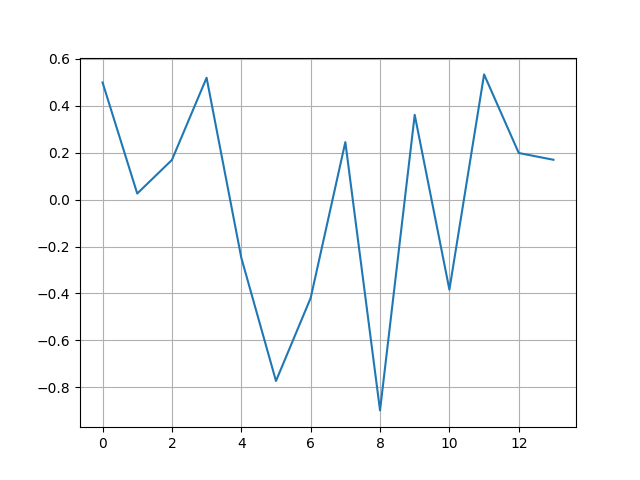

In [ ]:
plt.figure()
plt.plot(np.arange(0,len(distances), 1),distances)
plt.grid()
plt.show()

C:\Users\ACSG\AppData\Local\Temp\ipykernel_24680\3188709640.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[r,c] = fit[0] * X[r,c] + fit[1] * Y[r,c] + fit[2]


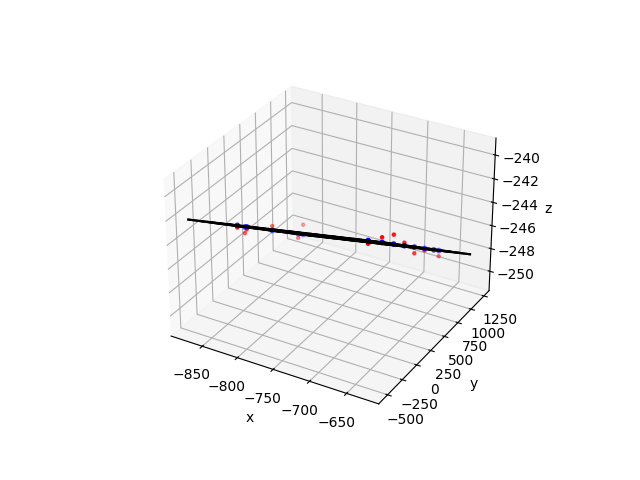

In [ ]:
# plot plane
plt.figure()
ax = plt.subplot(111, projection='3d')
for i, section in enumerate(data_np):
    x, y, z = section[:, 0], section[:, 1], section[:, 2]
    ax.scatter(x, y, z, color=colors[i % len(colors)], label=f'Section {i+1}', s=5)

x,y,z = projected_points[:,0], projected_points[:,1], projected_points[:,2]
ax.scatter(x, y, z, color="b", label=f'Section {i+1}', s=10)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
X,Y = np.meshgrid(np.linspace(xlim[0], xlim[1], 10),
                  np.linspace(ylim[0], ylim[1], 10))
Z = np.zeros(X.shape)
for r in range(X.shape[0]):
    for c in range(X.shape[1]):
        Z[r,c] = fit[0] * X[r,c] + fit[1] * Y[r,c] + fit[2]
ax.plot_wireframe(X,Y,Z, color='k')
colors = ['r', 'g', 'b']
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

## Rotate coordinate system

In [ ]:
import numpy as np

def rotation_matrix(v1: np.ndarray, v2: np.ndarray) -> np.ndarray:
    """
    Calculate the rotation matrix that rotates vector v1 to vector v2.

    Args:
        v1 (np.ndarray): Source vector of shape (3,).
        v2 (np.ndarray): Target vector of shape (3,).

    Returns:
        np.ndarray: Rotation matrix (3x3).
    """
    # Normalize the input vectors
    v1 = v1 / np.linalg.norm(v1)
    v2 = v2 / np.linalg.norm(v2)
    
    # Cross product to find the rotation axis
    axis = np.cross(v1, v2)
    axis_norm = np.linalg.norm(axis)
    
    # If the vectors are already aligned
    if axis_norm == 0:
        return np.eye(3)
    
    # Normalize the rotation axis
    axis /= axis_norm
    
    # Compute the angle between v1 and v2
    angle = np.arccos(np.clip(np.dot(v1, v2), -1.0, 1.0))
    
    # Rodrigues' rotation formula components
    K = np.array([
        [0, -axis[2], axis[1]],
        [axis[2], 0, -axis[0]],
        [-axis[1], axis[0], 0]
    ])
    
    # Rotation matrix
    R = np.eye(3) + np.sin(angle) * K + (1 - np.cos(angle)) * np.dot(K, K)
    
    return R


In [ ]:
norm = np.hstack((fit[0], fit[1], np.array([-1])))
v2 = np.array([0,0,1])
R = rotation_matrix(norm,v2)
R

array([[-0.62126188,  0.78353299, -0.01047571],
       [ 0.78353299,  0.62132956,  0.00506276],
       [ 0.01047571, -0.00506276, -0.99993231]])

In [ ]:
rotated_points = projected_points @ R.T

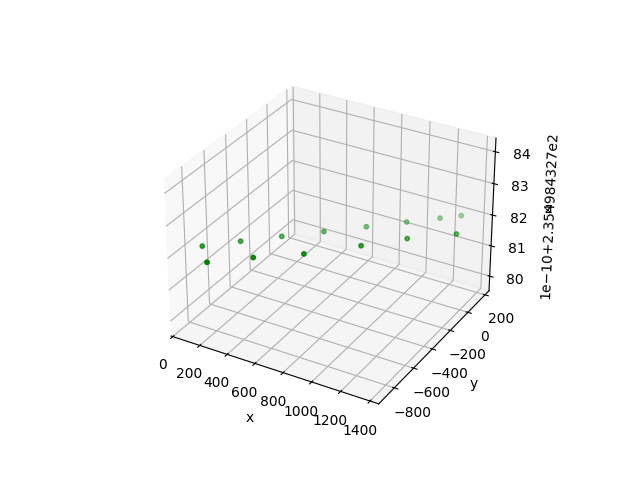

In [ ]:
# plot plane
plt.figure()
ax = plt.subplot(111, projection='3d')
x,y,z = rotated_points[:,0], rotated_points[:,1], rotated_points[:,2]
ax.scatter(x, y, z, color="green", label=f'Section {i+1}', s=10)


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

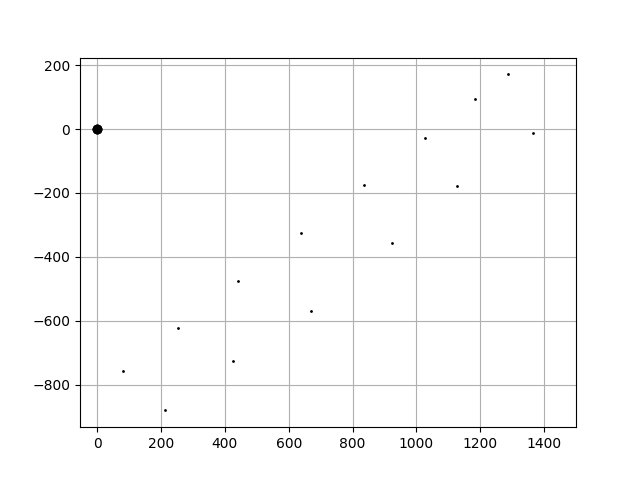

In [ ]:
from mpl_draggable_line import DraggableLine
fig = plt.figure()
ax =  fig.add_subplot(111)

ax.scatter(rotated_points[:,0], rotated_points[:,1], color='k', label='Mean Points', s=1)
ax.axis("equal")
ax.grid()

init_x = [0.25, 0.5]
init_y = [0.25, 0.5]

dl = DraggableLine(ax, init_x, init_y)
def my_callback(x: list[float, float], y: list[float, float]):
    print(np.sqrt((x[1]-x[0])**2+(y[1]-y[0])**2))

dl.on_line_changed(my_callback)

plt.show(block=False)

In [ ]:
tmp1 = data_np[0][3]
tmp2 = data_np[0][2]
calc_dist(tmp1,tmp2)

np.float64(239.83269093822122)

In [ ]:
data_np[0][0]

array([[-662.46053471],
       [1113.07716243],
       [-248.58974577]])

In [ ]:
rotated_points_copy = rotated_points.copy()
projected_points_copy = projected_points.copy()
data_np_copy = data_np.copy()

## DXF

In [ ]:
import ezdxf 
from ezdxf import units

def export_points_to_dxf(points: np.ndarray, filename: str):
    """
    Exports 3D points to a DXF file using the ezdxf library.

    Args:
        points (np.ndarray): A NumPy array of shape (n, 3) containing 3D points.
        filename (str): The output DXF file name.

    """
    assert points.shape[1] == 3, "Points array must have shape (n, 3)"
    
    # Create a new DXF document
    doc = ezdxf.new("R2010", setup=True)
    doc.units = units.MM
    msp = doc.modelspace()
    #sp.add_line((0, 0), (10, 0), dxfattribs={"linetype": "DASHED"})

    # Add each point to the modelspace
    #for point in points:
    #    msp.add_point(point[:2])

    msp.add_point([3,3])

    # Save the DXF file
    doc.saveas(filename)
    print(f"DXF file saved as {filename}")



ModuleNotFoundError: No module named 'ezdxf'

In [ ]:
#export_points_to_dxf(rotated_points/1000, "./test_dxf/res.dxf")

In [ ]:
2*np.pi / 160000/2 * 3000

0.05890486225480862

In [ ]:
2*np.pi / 228000 * 7500

0.2066837272098548